#추가한 컬럼 day, time에 대한 설명

##* 테니스를 치는 직장인들을 대상으로 디시젼 트리를 제작하려 함.
1. 직장인이 테나스를 칠 수 있는 time은 출근 이전과 퇴근 이후로 가정하였다.
2. day 중 평일은 퇴근하면 힘들기 때문에, 날씨가 조금만 안 좋더라도 테니스 치러 가지 않는 것으로 가정하였다.
3. 반면 주말은 출근하지 않기 때문에, 날씨가 안 좋더라도 사람들이 테니스 치러 가는 것으로 가정하였다.


##* 테스트 학습용 14개, 테스트용 데이터 5개를 추가 제작함.
1. day, time 컬럼의 데이터가 csv파일에서 문자열 데이터이기 때문에, 수치비교 과정에서 불편할 수 있다.
2. 따라서 label_encoder = LabelEncoder()를 사용하여, 수치비교에 유리한 숫자형 데이터로 변환하였다.

In [1]:
from google.colab import drive
drive.mount("/gdrive", force_remount=True)

Mounted at /gdrive


In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder # 입력데이터 전처리용
from sklearn import tree # 사이킷런에 디시젼 트리 라이브러리가 이미 있구나
import graphviz # 그래픽스럽게 시각화해주는 라이브러리

# 데이터 경로
file_path = "/gdrive/MyDrive/ML/PlayTennis2.csv"
# 데이터 경로로부터 파일을 읽음 (pandas 라이브러리 사용)
datas = pd.read_csv(file_path)

# 데이터 출력 (데이터 형태 확인)
print(datas)

     outlook  temp humidity  windy  day      time play
0      sunny   hot     high  False  Sun  07-21-35   no
1      sunny   hot     high   True  Mon  13-48-02   no
2   overcast   hot     high  False  Tue  20-10-54  yes
3      rainy  mild     high  False  Wed  07-33-19   no
4      rainy  cool   normal  False  Thu  16-56-08   no
5      rainy  cool   normal   True  Fri  02-45-37   no
6   overcast  cool   normal   True  Sat  09-17-23  yes
7      sunny  mild     high  False  Sun  18-03-59  yes
8      sunny  cool   normal  False  Mon  19-26-41  yes
9      rainy  mild   normal  False  Tue  18-05-10   no
10     sunny  mild   normal   True  Wed  20-52-47  yes
11  overcast  mild     high   True  Thu  20-38-12  yes
12  overcast   hot   normal  False  Fri  19-09-30  yes
13     rainy  mild     high   True  Sat  08-44-55   no
14     rainy   hot     high   True  Sun  19-27-04   no
15     rainy  cool   normal  False  Mon  07-31-16  yes
16     sunny  mild   normal   True  Tue  20-58-06  yes
17  overca

In [13]:
# 범주형 데이터를 수치형 데이터로 자동 변환해주는 라이브러리
# 문자열-> 숫자 (디시젼 트리에서 그냥 숫자끼리 비교하기 위해서)
label_encoder = LabelEncoder()

# 클래시스를 찍어보면, 숫자로 바뀌기 전인 원래 문자열을 보여줌.
# 정답 클래스 이름 (yes, no)
target_names = label_encoder.fit(datas['play']).classes_
print("target_names : {}".format(target_names))

# 써니, 오버캐스트, 레이니라는 문자열을 숫자로 바꿔주는 핏 트랜스폼하고, 바꾼 걸로 덮어쓰기
datas['outlook'] = label_encoder.fit_transform(datas['outlook'])
datas['temp'] = label_encoder.fit_transform(datas['temp'])
datas['humidity'] = label_encoder.fit_transform(datas['humidity'])
datas['windy'] = label_encoder.fit_transform(datas['windy'])

datas['day'] = label_encoder.fit_transform(datas['day'])
datas['time'] = label_encoder.fit_transform(datas['time'])

datas['play'] = label_encoder.fit_transform(datas['play'])


# 데이터 출력 (데이터 포맷 변환 후 결과 확인)
print(datas)

target_names : ['no' 'yes']
    outlook  temp  humidity  windy  day  time  play
0         2     1         0      0    3     1     0
1         2     1         0      1    1     6     0
2         0     1         0      0    5    13     1
3         1     2         0      0    6     3     0
4         1     0         1      0    4     7     0
5         1     0         1      1    0     0     0
6         0     0         1      1    2     5     1
7         2     2         0      0    3     8     1
8         2     0         1      0    1    11     1
9         1     2         1      0    5     9     0
10        2     2         1      1    6    16     1
11        0     2         0      1    4    14     1
12        0     1         1      0    0    10     1
13        1     2         0      1    2     4     0
14        1     1         0      1    3    12     0
15        1     0         1      0    1     2     1
16        2     2         1      1    5    17     1
17        0     1         0      1  

In [15]:
# 입력 데이터와 정답 데이터로 분리
x_data, y_data = datas.drop(['play'], axis=1), datas['play']

# 분리 결과 확인
print(x_data)
print()
print(y_data)

    outlook  temp  humidity  windy  day  time
0         2     1         0      0    3     1
1         2     1         0      1    1     6
2         0     1         0      0    5    13
3         1     2         0      0    6     3
4         1     0         1      0    4     7
5         1     0         1      1    0     0
6         0     0         1      1    2     5
7         2     2         0      0    3     8
8         2     0         1      0    1    11
9         1     2         1      0    5     9
10        2     2         1      1    6    16
11        0     2         0      1    4    14
12        0     1         1      0    0    10
13        1     2         0      1    2     4
14        1     1         0      1    3    12
15        1     0         1      0    1     2
16        2     2         1      1    5    17
17        0     1         0      1    6    18
18        0     2         0      1    4    15

0     0
1     0
2     1
3     0
4     0
5     0
6     1
7     1
8     1
9     0

In [16]:
# Decision tree 모델 학습 ()
decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy') # 디시젼 트리를 만들되, 엔트로피를 기준으로.
train_result = decision_tree.fit(x_data, y_data)

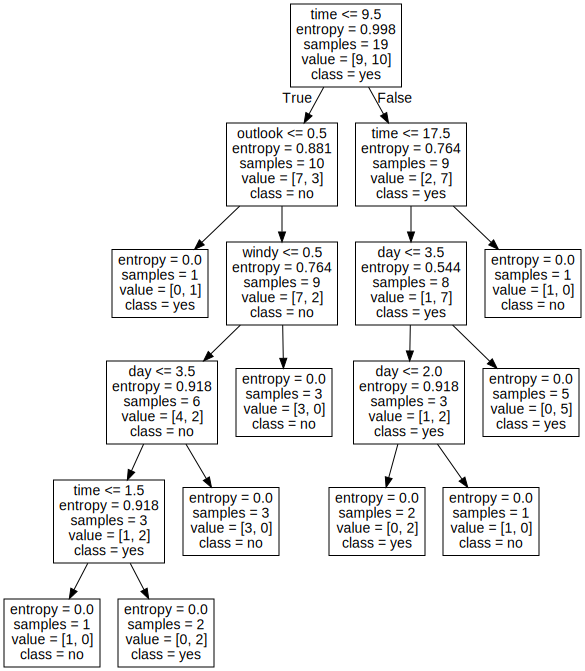

In [19]:
# 학습 결과 확인 (graphviz 라이브러리 사용)
graph = graphviz.Source(tree.export_graphviz(train_result, out_file=None,
                                             feature_names=x_data.columns,
                                             class_names=target_names))
graph

In [21]:
# 학습한 모델을 사용하여 테스트용 데이터 5개를 예측
test_data = x_data.iloc[14:19]  # 테스트 데이터 인덱싱

predict_result = decision_tree.predict(test_data)

# 예측 결과 출력 (실제 정답을 맞춘 경우 True로 표시됨)
real_y_data = y_data.iloc[14:19]
print(predict_result == real_y_data)

14    True
15    True
16    True
17    True
18    True
Name: play, dtype: bool


* 디시젼 트리는 수정이 쉽고 속도가 빠르다는 장점이 있다.